<h1>Welcome to my new Kernel</h1>

The Kernel objective is to analyse and try to understand some Indians Startup Patterns.<br>

Some informations about dataset below


<h2>Context</h2><br>
Interested in the Indian startup ecosystem just like me? Wanted to know what type of startups are getting funded in the last few years? Wanted to know who are the important investors? Wanted to know the hot fields that get a lot of funding these days? This dataset is a chance to explore the Indian start up scene. Deep dive into funding data and derive insights into the future!<br>

<h2>Content</h2><br>
This dataset has funding information of the Indian startups from January 2015 to August 2017. It includes columns with the date funded, the city the startup is based out of, the names of the funders, and the amount invested (in USD).<br>


<h2>Inspiration</h2>
Possible questions which could be answered are:<br>
- How does the funding ecosystem change with time?<br>
- Do cities play a major role in funding?<br>
- Which industries are favored by investors for funding?<br>
- Who are the important investors in the Indian Ecosystem?<br>
- How much funds does startups generally get in India?<br>

<h2>Importing the librarys</h2>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

<h2>Importing the data</h2>

In [2]:
df_startups = pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\Indian Startups Python  Explorations\startup_funding (1).csv",index_col=0)

<h2>Knowning our data</h2>

In [3]:
print(df_startups.shape)
print(df_startups.nunique())
print(df_startups.info())

(2372, 9)
Date                 701
StartupName         2001
IndustryVertical     743
SubVertical         1364
CityLocation          71
InvestorsName       1885
InvestmentType         7
AmountInUSD          329
Remarks               69
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 2371
Data columns (total 9 columns):
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: object(9)
memory usage: 185.3+ KB
None


<h2>Looking the NaN's</h2>

In [4]:
print("NaN's description")
print(df_startups.isnull().sum())

NaN's description
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64


<h2>Looking the data</h2>

In [5]:
df_startups.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
SNo,,,,,,,,,
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [6]:
df_startups.shape

(2372, 9)

<h2>Starting the exploration looking the  Amount distribuitions </h2>

In [7]:
df_startups["AmountInUSD"] = df_startups["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))

In [8]:
print("Min Amount")
print(df_startups["AmountInUSD"].min())
print("Mean Amount")
print(round(df_startups["AmountInUSD"].mean(),2))
print("Median Amount")
print(df_startups["AmountInUSD"].median())
print("Max Amount")
print(df_startups["AmountInUSD"].max())
print("Standard Deviation Amount")
print(round(df_startups["AmountInUSD"].std(),2))

Min Amount
16000.0
Mean Amount
12031073.1
Median Amount
1070000.0
Max Amount
1400000000.0
Standard Deviation Amount
64031175.13


<h2> Amount in USD distribuition </h2>

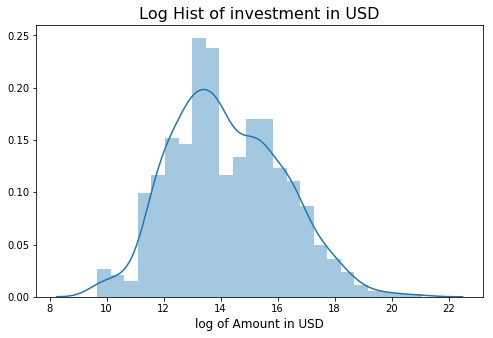

In [9]:
#Let's create a new feature that is a Amount with log to better see the values distribuitions
df_startups['AmountInUSD_log'] = np.log(df_startups["AmountInUSD"] + 1)

plt.figure(figsize=(8,5))
sns.distplot(df_startups['AmountInUSD_log'].dropna())
plt.xlabel('log of Amount in USD', fontsize=12)
plt.title("Log Hist of investment in USD", fontsize=16)
plt.show()

<h2> Knowing the Investment Types </h2>

Description of Investiment Types: 
Seed Funding      1271
Private Equity    1066
SeedFunding         30
PrivateEquity        1
Crowd funding        1
Crowd Funding        1
Debt Funding         1
Name: InvestmentType, dtype: int64


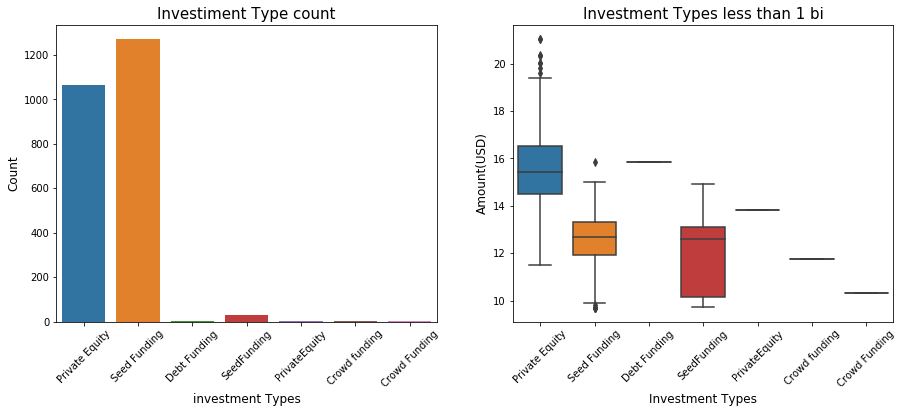

In [10]:
InvestmentTypeVC = df_startups.InvestmentType.value_counts()
print("Description of Investiment Types: ")
print(InvestmentTypeVC)

plt.figure(figsize = (15,12))
plt.subplot(221)

g = sns.countplot(x="InvestmentType", data=df_startups)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Investiment Type count", fontsize=15)
g.set_xlabel("investment Types", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(222)
g1 = sns.boxplot(x="InvestmentType", y="AmountInUSD_log", 
            data=df_startups)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Investment Types less than 1 bi", fontsize=15)
g1.set_xlabel("Investment Types", fontsize=12)
g1.set_ylabel("Amount(USD)", fontsize=12)

plt.show()

<h2>Looking through the principal Investors</h2>

Description count of Investors
Undisclosed Investors       33
Undisclosed investors       27
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
RoundGlass Partners         10
Undisclosed Investor        10
Brand Capital               10
SAIF Partners                9
Undisclosed                  9
Accel Partners               9
Undisclosed investor         9
Name: InvestorsName, dtype: int64


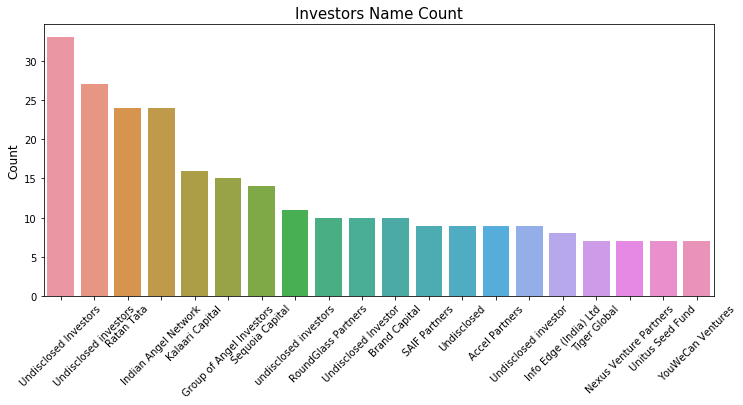

In [11]:
Investors = df_startups.InvestorsName.value_counts()

print("Description count of Investors")
print(Investors[:15])

plt.figure(figsize = (12,5))
g = sns.barplot(x=Investors.index[:20],y=Investors.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Investors Name Count", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.show()

<h2>City Location Column</h2>

Description count of Location
Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Name: CityLocation, dtype: int64


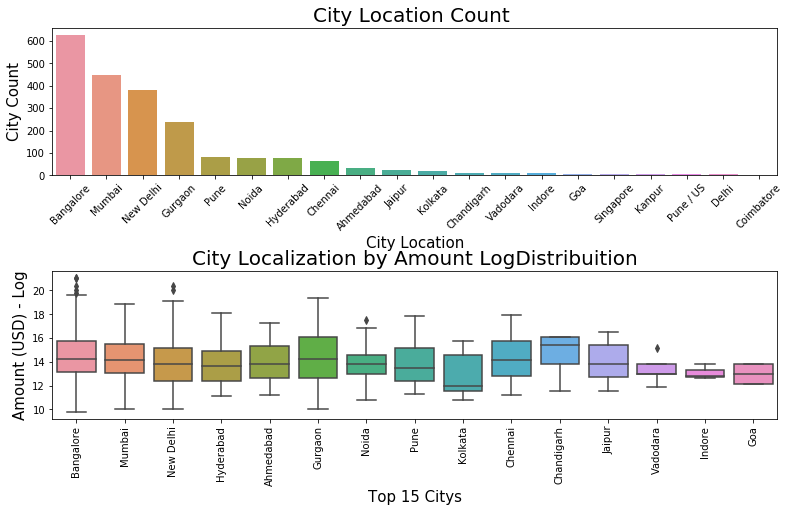

In [12]:
location = df_startups['CityLocation'].value_counts()
print("Description count of Location")
print(location[:5])

plt.figure(figsize=(13,7))

plt.subplot(211)
sns.barplot(x=location.index[:20], y=location.values[:20])
plt.xticks(rotation=45)
plt.xlabel('City Location', fontsize=15)
plt.ylabel('City Count', fontsize=15)
plt.title("City Location Count ", fontsize=20)

plt.subplot(212)
g = sns.boxplot(x='CityLocation', y="AmountInUSD_log",
                data=df_startups[df_startups.CityLocation.isin(location[:15].index.values)])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("City Localization by Amount LogDistribuition", fontsize=20)
g.set_xlabel("Top 15 Citys", fontsize=15)
g.set_ylabel("Amount (USD) - Log", fontsize=15)

plt.subplots_adjust(hspace = 0.65,top = 0.9)

plt.show()

<h2>Industry Vertical </h2>

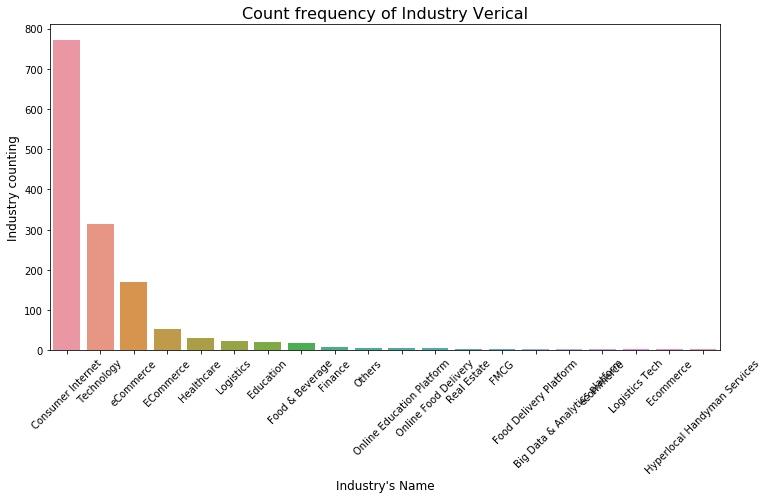

In [13]:
industry = df_startups['IndustryVertical'].value_counts()[:20]

plt.figure(figsize=(12,6))
sns.barplot(x=industry.index, y=industry.values)
plt.xticks(rotation=45)
plt.xlabel("Industry's Name", fontsize=12)
plt.ylabel('Industry counting', fontsize=12)
plt.title("Count frequency of Industry Verical", fontsize=16)
plt.show()

<h2>Let's explore furthur this Industry's</h2><br>
What's the most frequent in the first 3 ? 
- Consumer Internet
- Technology
- eCommerce

We have some NaN's on this column, so I will be careful 

<h2> Consumer Internet Suvertical</h2>

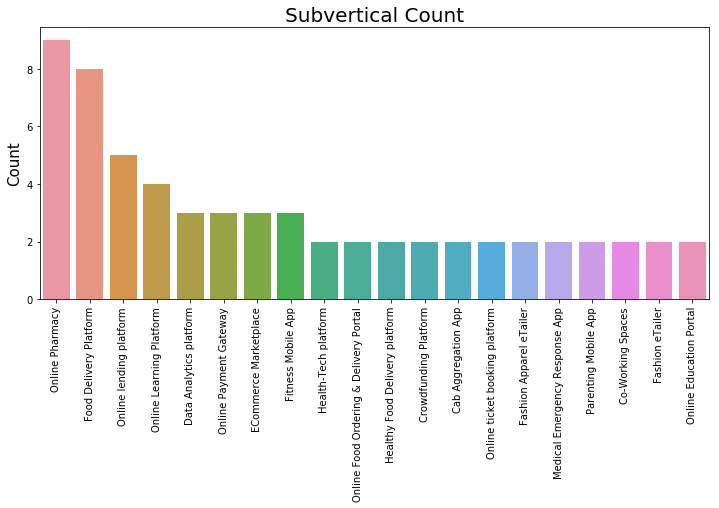

In [14]:
cons_sub = df_startups['SubVertical'].value_counts()

plt.figure(figsize = (12,5))

g = sns.barplot(x=cons_sub.index[:20],y=cons_sub.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Subvertical Count", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

<h2> Technology Subvertical </h2>

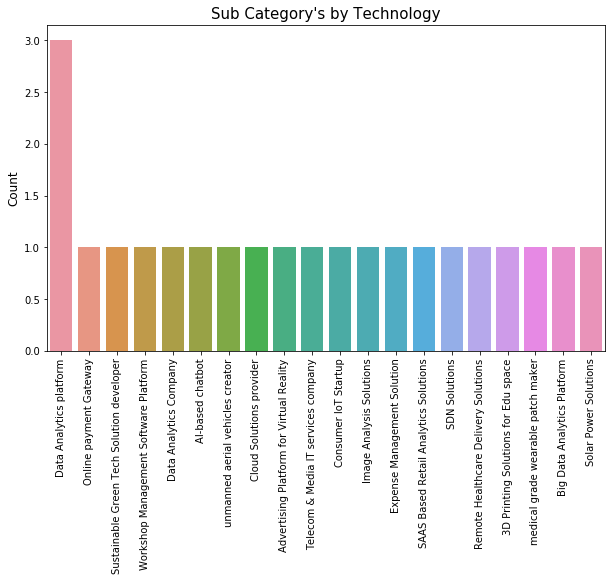

In [15]:
tech_sub = df_startups[df_startups['IndustryVertical'] == 'Technology']['SubVertical'].value_counts()

plt.figure(figsize = (10,6))
g = sns.barplot(x=tech_sub.index[:20],y=tech_sub.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Sub Category's by Technology", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()

Data Analytics platform ?!?! WoW Very Interesting information

<h2>Ecommerce Subvertical </h2>

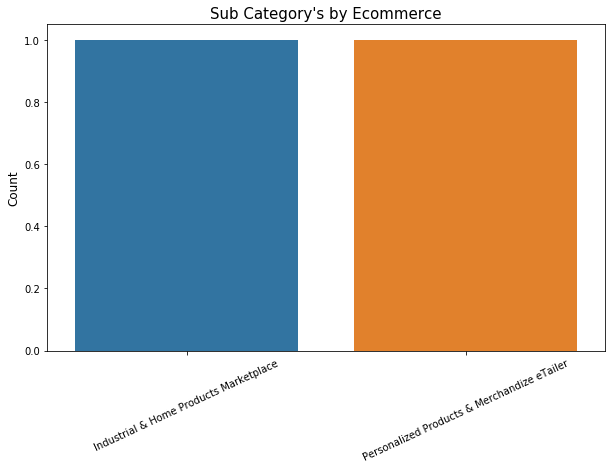

In [16]:
tech_sub = df_startups[df_startups['IndustryVertical'] == 'Ecommerce']['SubVertical'].value_counts()

plt.figure(figsize = (10,6))
g = sns.barplot(x=tech_sub.index[:2],y=tech_sub.values[:2])
g.set_xticklabels(g.get_xticklabels(),rotation=25)
g.set_title("Sub Category's by Ecommerce", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()

Ecommerce have each name unique so it's hardest to know, might testing with worcloud?

<h2>Let's take a look on Wordcloud's</h2>
-First lookng the Subvertical most frequent words

In [18]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=50,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_startups[df_startups['IndustryVertical'] == 'Ecommerce']['SubVertical']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

NameError: name 'STOPWORDS' is not defined

<Figure size 1080x1080 with 0 Axes>

<h2>Some explorations on Time variables</h2>

In [19]:
df_startups.Date.replace((['12/05.2015', '13/04.2015','15/01.2015','22/01//2015']), \
                         ('12/05/2015','13/04/2015','15/01/2015','22/01/2015'), inplace=True)

In [20]:
df_startups['Date'] = pd.to_datetime(df_startups['Date'])

df_startups['Date_month_year'] = df_startups['Date'].dt.to_period("M")
df_startups['Date_year'] = df_startups['Date'].dt.to_period("A")

<h2>Exploring the Date time colum</h2>

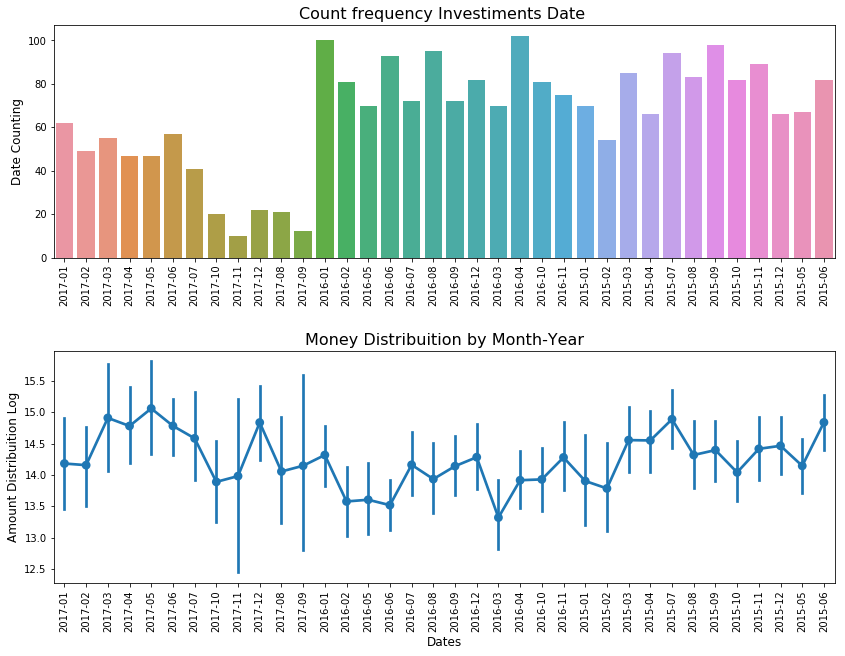

In [21]:
plt.figure(figsize=(14,10))
plt.subplot(211)
sns.countplot(x='Date_month_year', data=df_startups)
plt.xticks(rotation=90)
plt.xlabel('', fontsize=12)
plt.ylabel('Date Counting', fontsize=12)
plt.title("Count frequency Investiments Date ", fontsize=16)

plt.subplot(212)
sns.pointplot(x='Date_month_year', y='AmountInUSD_log', data=df_startups)
plt.xticks(rotation=90)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Amount Distribuition Log', fontsize=12)
plt.title("Money Distribuition by Month-Year", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

<h2>Exploring the Remarks variable.</h2>

Remarks description
Series A                          177
Series B                           64
Pre-Series A                       37
Series C                           28
Strategic Investment               11
Series D                           11
Late Stage                         10
Strategic Funding                   6
At the 10 minute million event      6
pre-Series A                        6
Name: Remarks, dtype: int64


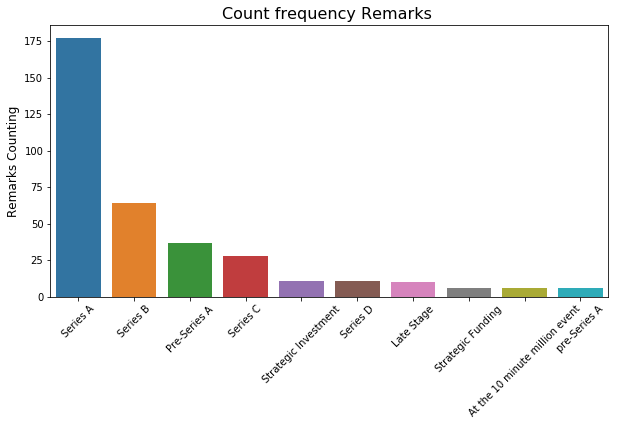

In [22]:
Remarks = df_startups.Remarks.value_counts()

print("Remarks description")
print(Remarks[:10])

plt.figure(figsize=(10,5))

sns.barplot(x=Remarks.index[:10], y=Remarks.values[:10])
plt.xticks(rotation=45)
plt.xlabel('', fontsize=12)
plt.ylabel('Remarks Counting', fontsize=12)
plt.title("Count frequency Remarks ", fontsize=16)
plt.show()

<h2>Let's see the Word cloud of Investors in Consumer Internet</h2>

In [24]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_startups['SubVertical']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

NameError: name 'STOPWORDS' is not defined

<Figure size 1080x1080 with 0 Axes>

In [25]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_startups['InvestorsName']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

NameError: name 'STOPWORDS' is not defined

<Figure size 1080x1080 with 0 Axes>

<h2>Let's look the Technology Investors wordcloud</h2>

In [26]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_startups[df_startups['IndustryVertical'] == 'Technology']['InvestorsName']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INVESTORS TECHNOLOGY")
plt.axis('off')
plt.show()

NameError: name 'STOPWORDS' is not defined

<Figure size 1080x1080 with 0 Axes>

In [31]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_startups[df_startups['IndustryVertical'] == 'Ecommerce']['InvestorsName']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INVESTORS ECOMMERCE")
plt.axis('off')
plt.show()

NameError: name 'STOPWORDS' is not defined

<Figure size 1080x1080 with 0 Axes>

I will continue this Analyse